In [1]:
import importlib
import PlumeModel
from PlumeModel import preprocess_ARMBE, preprocess_data
importlib.reload(PlumeModel)
import time
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
output_dir = '/home/fiaz/plume_model/'  # directory to save the output files
output_file_name = 'plume_props_CACTI'  # name of the output file
input_dir = '/neelin2020/ARM/CACTI/'
fils = [str(i) for i in Path(input_dir).glob('corarmbeatm*.nc')]  # look for all .nc files in the directory

pm = PlumeModel.PlumeModel(fils = fils,
                           preprocess = preprocess_ARMBE,
                           output_file_name = output_file_name, 
                           output_dir=output_dir, 
                           launch_opt = 'specified',
                           launch_level = 825)

In [3]:
pm.preprocess_data()
pm.mixing_coefficients()

In [4]:
stime = time.time()
pm.run_plume(mix = pm.mix_opt)
print(f'Done. Took {time.time()-stime: .3f} seconds')

RUNNING DIB PLUME COMPUTATION
46
46
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
46
47
48
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
1

In [5]:
pm.postprocess_save()

SAVING FILE
File saved as /home/fiaz/plume_model/plume_props_CACTI.nc


/home/fiaz/plume_model/thermodynamic_functions.py:268: RuntimeWarning: invalid value encountered in log
  TL = (2840. / ((3.5*np.log(temp)) - (np.log(ev_hPa)) - 4.805)) + 55.
/home/fiaz/plume_model/thermodynamic_functions.py:268: RuntimeWarning: divide by zero encountered in log
  TL = (2840. / ((3.5*np.log(temp)) - (np.log(ev_hPa)) - 4.805)) + 55.


### Analyze saved output

In [5]:
import xarray as xr
# compute LFT buoy

def compute_layer_ave_buoy(ds, pstrt = 850, pend = 500):
    """
    Use the virtual temperature to compute 
    layer-averaged buoyancy
    """
    g = 9.8
    buoy = g * (ds.Tv_plume - ds.Tv_env)/ds.Tv_env
    buoy_slice = buoy.sel(lev = slice(pstrt, pend)).dropna('lev')
    layer_depth = buoy_slice.lev.isel(lev = 0) - buoy_slice.lev.isel(lev = -1) 
    return -buoy_slice.integrate('lev')/(layer_depth)
 

fil_out = pm.output_file_name.with_suffix('.nc')
ds = xr.open_dataset(fil_out)
buoy_lft = compute_layer_ave_buoy(ds)
ds_cacti = xr.open_mfdataset(fils)
ds_cacti = ds_cacti.where(ds_cacti.time.isin(buoy_lft.time), drop = True)
prc = ds_cacti.precip_rate_sfc
prc = prc.where(prc.time.isin(buoy_lft.time), drop = True)


In [10]:
ds.T_plume.isel(time = 1)#.plot(x = 'time', y = 'lev', yincrease = False)

<xarray.DataArray 'T_plume' (lev: 180)>
array([       nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 288.194548, 287.651305,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan])
Coordinates:
    time     datetime64[ns] 2018-09-28T12:30:00
  * lev      (lev) int64 1050 1045 1040 1035 1030 1025 ... 175 170 165 160 155

Hydrometeor information

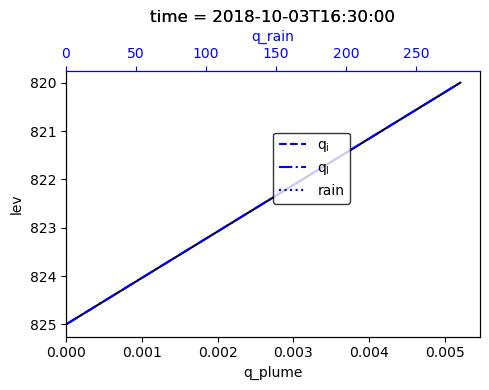

In [7]:
g = 9.8 
fig, axx = plt.subplots(1, 1, figsize = (5,4))
tidx = 10

ax = axx
ax2 = ax.twiny()
ds.q_plume.isel(time = tidx).plot(y = 'lev', yincrease = False, ax = ax, color = 'black')
ds.qi_plume.isel(time = tidx).plot(y = 'lev', yincrease = False, ax = ax2, c = 'blue', linestyle = '--', label = '$\mathrm{q_i}$')
ds.ql_plume.isel(time = tidx).plot(y = 'lev', yincrease = False, ax = ax2, c = 'blue', linestyle = '-.', label = '$\mathrm{q_l}$')
ds.q_rain.isel(time = tidx).plot(y = 'lev', yincrease = False, ax = ax2, c = 'blue', linestyle = ':', label = 'rain')

ax2.spines['top'].set_color('blue') 
ax2.xaxis.label.set_color('blue')
ax2.tick_params(axis='x', colors='blue')
ax.set_xlim(left = 0)
ax2.set_xlim(left = 0)
leg = ax2.legend(loc = (0.5, 0.5))
leg.get_frame().set_edgecolor('black')

plt.tight_layout()

Thermal or Archimedean Buoyancy: $ B = g \frac{T_{vp} - \bar{T}_v}{\bar{T}_v}$<br>
$B_L = \frac{1}{\Delta p_L}\int^{500}_{800} B dp$<br>
$T_v = T(1 + \epsilon q_v - q_c)$ <br>
$\theta_e = f(T,q,p)$

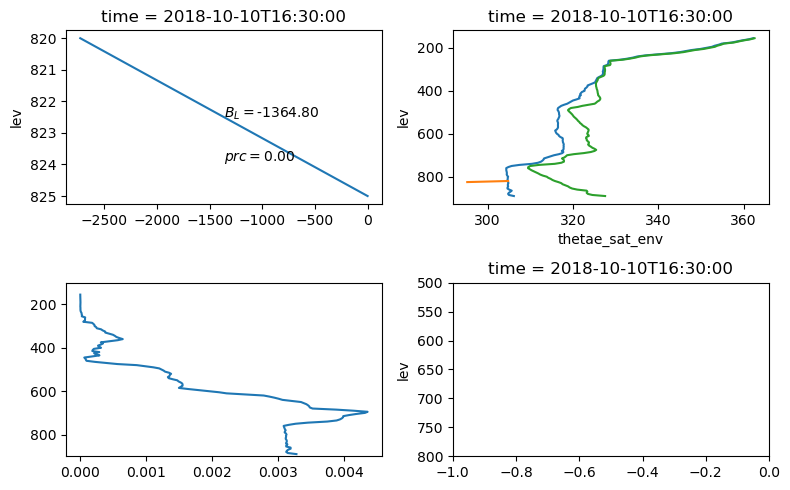

In [8]:
g = 9.8 
fig, axx = plt.subplots(2, 2, figsize = (8,5))
tidx = 40

ax = axx[0,0]
buoy = g * (ds.Tv_plume - ds.Tv_env)/ds.Tv_env
buoy_slice = buoy.sel(lev = slice(900, 500)).dropna('lev')
buoy_slice.isel(time = tidx).plot(y = 'lev', yincrease = False, ax = ax)
ax.text(0.5, 0.5, f'$B_L=${buoy_lft.isel(time = tidx).item():.2f}', transform = ax.transAxes)
ax.text(0.5, 0.25, f'$prc=${ds_cacti.precip_rate_sfc.isel(time = tidx).values.item():.2f}', transform = ax.transAxes)

ax = axx[0, 1]
ds.thetae_env.isel(time = tidx).plot(y = 'lev', yincrease = False, ax = ax)
ds.thetae_plume.isel(time = tidx).plot(y = 'lev', yincrease = False, ax = ax)

ds.thetae_sat_env.isel(time = tidx).plot(y = 'lev', yincrease = False, ax = ax)

ax = axx[1,0]
ax.plot(pm.q[tidx, :], pm.lev)
ax.set_ylim(900, 100)
# pm.q(time = tidx).plot(y = 'lev', yincrease = False, ax = ax)

ax = axx[1,1]
# ds_cacti.sphum_p.isel(time = tidx).plot(y = 'pressure', ax = ax, yincrease = False)
(9.8 * (ds.Tv_plume - ds.Tv_env)/ds.Tv_env).isel(time = tidx).plot(y = 'lev', ax = ax, yincrease = False)
ax.set_ylim(800, 500)
ax.set_xlim(-1, 0)
plt.tight_layout()

In [20]:
# manual integration to check xarray's functionality
# x = buoy_slice.sel(lev = slice(800, 500))
# y = (x.isel(lev = slice (1, None)).assign_coords(lev = range(x.lev.size - 1)) + x.isel(lev = slice (0, -1)).assign_coords(lev = range(x.lev.size - 1))) * 0.5
# dp = abs(buoy_slice.sel(lev = slice(800, 500)).lev.diff('lev')).assign_coords(lev = range(x.lev.size - 1))
# Deltap = x.lev.isel(lev = 0) - x.lev.isel(lev = -1)
# buoy_lft_direct = (y * dp).sum('lev')/Deltap

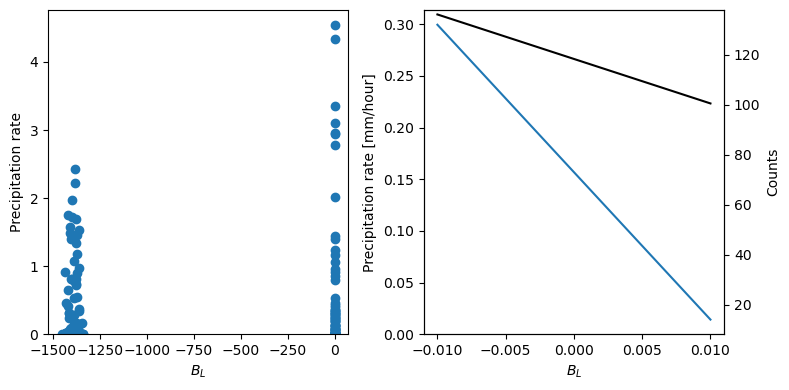

In [9]:
import numpy as np
buoy_bins = np.arange(-0.5, 0.22, 0.02)

fig, axx = plt.subplots(1, 2, figsize = (8, 4))
ax = axx[0]
ax.scatter(buoy_lft, ds_cacti.precip_rate_sfc)
ax.set_ylim(bottom = 0)
ax.set_ylabel('Precipitation rate')
ax.set_xlabel('$B_L$')

ax = axx[1]
ax2 = ax.twinx()
ds_cacti.precip_rate_sfc.groupby_bins(buoy_lft, bins = buoy_bins).count().plot(ax = ax2)
ds_cacti.precip_rate_sfc.groupby_bins(buoy_lft, bins = buoy_bins).mean().plot(ax = ax, c = 'black')
ax.set_ylim(bottom = 0)
ax2.set_ylabel('Counts')
ax.set_xlabel('$B_L$')
plt.tight_layout()


/tmp/ipykernel_266169/1662975625.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(ScalarMappable(cmap = cm, norm = norm),


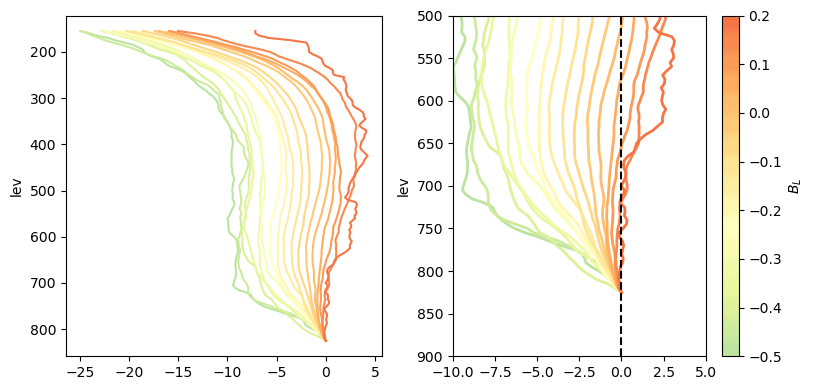

In [22]:
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib import ticker

fig, axx = plt.subplots(1, 2, figsize = (8, 4))

ax = axx[0]
DeltaTv = (ds.Tv_plume - ds.Tv_env).groupby_bins(buoy_lft, bins = buoy_bins)
cmap = plt.colormaps['Spectral_r']
norm = Normalize(vmin = buoy_bins[0], vmax = buoy_bins[-1])
cm_list = []
for i, (key, group) in enumerate(DeltaTv):
    group.mean('time').plot(y = 'lev', yincrease = False, 
                            ax = ax, label = key, color = cmap(norm(key.mid)))
    
    group.mean('time').plot(y = 'lev', yincrease = False, 
                            ax = axx[1], label = key, linewidth = 2.,
                            color = cmap(norm(key.mid)))
    cm_list.append(cmap(norm(key.mid)))
    
    cm_list.append(cmap(norm(key.mid)))

cm = LinearSegmentedColormap.from_list('defcol', cm_list)

axx[1].set_ylim(900,500)
axx[1].set_xlim(-10, 5)
axx[1].vlines(0, 900, 500, linestyle = '--', color = 'black')
plt.tight_layout()

cb = plt.colorbar(ScalarMappable(cmap = cm, norm = norm), 
             ticks = buoy_bins[::4], label='$B_L$')
cb.ax.yaxis.set_major_locator(ticker.AutoLocator())


Plot hydrometeor information

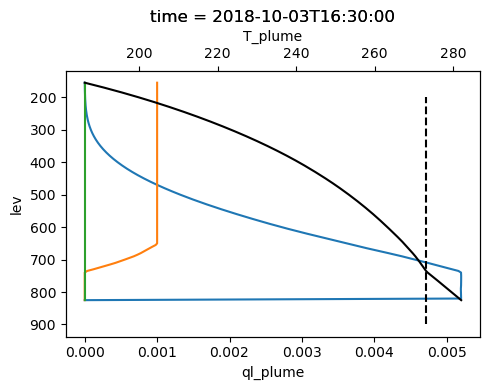

Some times have freezing level below the LCL, which permits no plume liquid water to exist